In [14]:
import pandas as pd
import requests
import time
import urllib.parse

In [15]:
ISIN_NUMBER="INF00XX01168"

In [16]:
data=dict()
url = f"https://mf.captnemo.in/kuvera/{ISIN_NUMBER}"
try:
    res = requests.get(url)
    if res.status_code != 200:
        print(f"Failed to fetch for {ISIN_NUMBER}")

    fund_data = res.json()
    data=fund_data[0]
except Exception as e:
    print(f"Error for ISIN {ISIN_NUMBER}: {e}")

In [17]:
nav_data=dict()
url = f"https://mf.captnemo.in/nav/{ISIN_NUMBER}"
try:
    res = requests.get(url)
    if res.status_code != 200:
        print(f"Failed to fetch for {ISIN_NUMBER}")

    nav_data = res.json()
except Exception as e:
    print(f"Error for ISIN {ISIN_NUMBER}: {e}")

In [18]:
def explain_and_summarize_fund(fund):
    def get_safe(data, default='N/A'):
        return data if data is not None else default

    def interpret_return(value, period):
        if isinstance(value, (int, float)):
            if value >= 15:
                return f"✅ Excellent {period} return. Shows strong performance over time."
            elif value >= 10:
                return f"✅ Good {period} return. Better than average."
            elif value >= 7:
                return f"🟡 Moderate {period} return. Decent if it stays consistent."
            else:
                return f"🔻 Low {period} return. Could underperform compared to peers."
        return f"⚠️ {period} return not available."

    def interpret_volatility(vol):
        if not isinstance(vol, (int, float)):
            return "⚠️ Volatility data not available."
        elif vol < 10:
            return "✅ Low volatility. Your investment stays relatively stable."
        elif vol < 20:
            return "🟡 Moderate volatility. Some ups and downs—manageable risk."
        else:
            return "🔻 High volatility. Be ready for big swings in your investment."

    def interpret_expense_ratio(expense):
        if not isinstance(expense, (int, float)):
            return "⚠️ Expense ratio unavailable."
        elif expense < 0.5:
            return "✅ Low cost. Most of your money stays invested."
        elif expense < 1:
            return "🟡 Slightly high. Some of your return goes into fees."
        else:
            return "🔻 Expensive. High fees can eat into profits."

    def interpret_info_ratio(ratio):
        if not isinstance(ratio, (int, float)):
            return "⚠️ Info Ratio not available."
        elif ratio > 0.5:
            return "✅ Consistently beats its benchmark after adjusting for risk."
        elif ratio > 0:
            return "🟡 Performs reasonably better than benchmark with some risks."
        else:
            return "🔻 Poor at delivering extra returns for the risk it takes."

    def interpret_rating(rating):
        if isinstance(rating, int):
            if rating >= 4:
                return "✅ Highly rated by analysts. Good historical track record."
            elif rating == 3:
                return "🟡 Average rating. Might want to compare with other funds."
            elif rating > 0:
                return "🔻 Low rated. Not a top performer."
        return "⚠️ No rating data available."

    def interpret_crisil_rating(cr):
        return cr if cr else "N/A"

    def build_quick_summary():
        highlights = []
        if isinstance(year_3, (int, float)) and year_3 >= 12:
            highlights.append("📈 Strong 3-year returns")
        if isinstance(volatility, (int, float)) and volatility < 10:
            highlights.append("🛡️ Low volatility")
        if isinstance(expense_ratio, (int, float)) and expense_ratio < 0.75:
            highlights.append("💸 Low expense ratio")
        if isinstance(info_ratio, (int, float)) and info_ratio > 0.5:
            highlights.append("📊 Great info ratio (beats benchmark)")
        if isinstance(fund_rating, int) and fund_rating >= 4:
            highlights.append("⭐ Highly rated")
        if not highlights:
            highlights.append("ℹ️ No standout features, needs deeper review.")
        return " • ".join(highlights)

    def build_should_you_invest():
        reasons = []
        if isinstance(year_3, (int, float)) and year_3 >= 12:
            reasons.append("has delivered solid medium-term performance")
        if isinstance(volatility, (int, float)) and volatility < 10:
            reasons.append("maintains a low volatility profile")
        if isinstance(expense_ratio, (int, float)) and expense_ratio < 0.75:
            reasons.append("keeps costs investor-friendly")
        if isinstance(info_ratio, (int, float)) and info_ratio > 0.5:
            reasons.append("consistently outperforms its benchmark after adjusting for risk")
        if isinstance(fund_rating, int) and fund_rating >= 4:
            reasons.append("is highly rated for consistent returns")

        if reasons:
            joined = "; ".join(reasons)
            return f"👍 This fund {joined}. It may be suitable if you’re looking for long-term growth with manageable risk."
        return "🤔 This fund doesn’t stand out on key metrics right now. You may want to compare it with others before investing."

    def generate_google_news_url(fund_name):
        """
        Returns a Google News search URL for the mutual fund.
        Example: 'Axis Bluechip Fund Direct Plan Growth' =>
                https://news.google.com/search?q=Axis+Bluechip+Fund+Direct+Plan+Growth
        """
        if not fund_name:
            return "⚠️ Fund name not provided."

        query = urllib.parse.quote_plus(fund_name)
        return f"https://news.google.com/search?q={query}"


    # ---------------- Extract Data ----------------
    returns = fund.get("returns", {})
    comparison = fund.get("comparison", [{}])[0]

    year_1 = returns.get('year_1')
    year_3 = returns.get('year_3')
    year_5 = returns.get('year_5')
    inception = returns.get('inception')

    volatility = fund.get('volatility')
    expense_ratio = fund.get('expense_ratio')
    info_ratio = comparison.get('info_ratio')
    fund_rating = fund.get('fund_rating')

    # ---------------- Main Text ----------------
    text = f"""
📌 **Fund Name**: {fund.get('short_name', 'N/A')}

🚀 **Quick Summary (TL;DR)**  
{build_quick_summary()}

💭 **Should You Invest?**  
{build_should_you_invest()}

🗂️ **Fund Category**: {get_safe(fund.get('fund_category'))}  
🔄 **Fund Type**: {get_safe(fund.get('fund_type'))}  
🧠 *Category tells you what style the fund follows. Fund type affects how liquid your investment is.*

💼 **What is it?**  
This is a *Multi-Cap Mutual Fund*, meaning it invests in companies of **all sizes**—large, mid, and small. It's designed to grow your money over the **long term** by taking advantage of different kinds of companies.

📅 **Start Date**: {get_safe(fund.get('start_date'))}  
🧠 *Older funds have a longer track record, which helps assess their stability and performance.*

📈 **Returns**

- **1-Year Return**: {get_safe(year_1)}%  
  {interpret_return(year_1, '1-Year')}

- **3-Year Return**: {get_safe(year_3)}%  
  {interpret_return(year_3, '3-Year')}

- **5-Year Return**: {get_safe(year_5)}%  
  {interpret_return(year_5, '5-Year')}

- **Since Inception**: {get_safe(inception)}%  
  🧠 *This is the average return since the fund started.*

📊 **Volatility**: {get_safe(volatility)}  
🧠 *Volatility means how much the fund's value moves up or down.*  
{interpret_volatility(volatility)}

💹 **Information Ratio**: {get_safe(info_ratio)}  
🧠 *Shows how well the fund performs compared to its benchmark after risk adjustment.*  
{interpret_info_ratio(info_ratio)}

💰 **Assets Under Management (AUM)**: ₹{int(fund.get('aum', 0)):,} Cr  
🧠 *Total money invested in the fund. High AUM shows popularity but might affect flexibility.*

🧾 **Expense Ratio**: {get_safe(expense_ratio)}%  
🧠 *Annual fee charged by the fund. Lower is usually better.*  
{interpret_expense_ratio(float(expense_ratio))}

🏅 **CRISIL Rating**: {interpret_crisil_rating(fund.get('crisil_rating'))}  
🧠 *A third-party rating that indicates overall performance.*

⭐ **Fund Rating**: {'★' * int(fund_rating) if fund_rating else 'N/A'}  
🧠 *Based on past returns, risk profile, and consistency.*  
{interpret_rating(fund_rating)}

💼 **Lump Sum Option**: {'✅ Available' if fund.get('lump_available') == 'Y' else '❌ Not Available'} | Minimum: ₹{int(fund.get('lump_min', 0))}  
📆 **SIP Option**: {'✅ Available' if fund.get('sip_available') == 'Y' else '❌ Not Available'} | Minimum SIP: ₹{int(fund.get('sip_min', 0))}  
🧠 *SIPs let you invest small amounts monthly. Lumpsum is useful if you want to invest a large amount upfront.*

🔗 **Want to Learn More?** Check out: {get_safe(generate_google_news_url(fund.get('name')))}

-----------------------------------------------------------
"""
    return text

In [19]:
print(explain_and_summarize_fund(data))


📌 **Fund Name**: ITI Multi Cap

🚀 **Quick Summary (TL;DR)**  
📈 Strong 3-year returns • 📊 Great info ratio (beats benchmark)

💭 **Should You Invest?**  
👍 This fund has delivered solid medium-term performance; consistently outperforms its benchmark after adjusting for risk. It may be suitable if you’re looking for long-term growth with manageable risk.

🗂️ **Fund Category**: Multi Cap Fund  
🔄 **Fund Type**: Equity  
🧠 *Category tells you what style the fund follows. Fund type affects how liquid your investment is.*

💼 **What is it?**  
This is a *Multi-Cap Mutual Fund*, meaning it invests in companies of **all sizes**—large, mid, and small. It's designed to grow your money over the **long term** by taking advantage of different kinds of companies.

📅 **Start Date**: 2019-05-15  
🧠 *Older funds have a longer track record, which helps assess their stability and performance.*

📈 **Returns**

- **1-Year Return**: -3.34313%  
  🔻 Low 1-Year return. Could underperform compared to peers.

-

In [20]:
#what is it.Should be fixed.
def explain_and_summarize_fund(fund):
    def get_safe(data, default='N/A'):
        return data if data is not None else default

    def interpret_return(value):
        if isinstance(value, (int, float)):
            if value >= 15:
                return "✅ Excellent return. Shows strong performance over time."
            elif value >= 10:
                return "✅ Good return. Better than average."
            elif value >= 7:
                return "🟡 Moderate return. Decent if it stays consistent."
            else:
                return "🔻 Low return. Could underperform compared to peers."
        return "⚠️ Return not available."

    def interpret_volatility(vol):
        if not isinstance(vol, (int, float)):
            return "⚠️ Volatility data not available."
        elif vol < 10:
            return "✅ Low volatility. Your investment stays relatively stable."
        elif vol < 20:
            return "🟡 Moderate volatility. Some ups and downs—manageable risk."
        else:
            return "🔻 High volatility. Be ready for big swings in your investment."

    def interpret_expense_ratio(expense):
        if not isinstance(expense, (int, float)):
            return "⚠️ Expense ratio unavailable."
        elif expense < 0.5:
            return "✅ Low cost. Most of your money stays invested."
        elif expense < 1:
            return "🟡 Slightly high. Some of your return goes into fees."
        else:
            return "🔻 Expensive. High fees can eat into profits."

    def interpret_info_ratio(ratio):
        if not isinstance(ratio, (int, float)):
            return "⚠️ Info Ratio not available."
        elif ratio > 0.5:
            return "✅ Consistently beats its benchmark after adjusting for risk."
        elif ratio > 0:
            return "🟡 Performs reasonably better than benchmark with some risks."
        else:
            return "🔻 Poor at delivering extra returns for the risk it takes."

    def interpret_rating(rating):
        if isinstance(rating, int):
            if rating >= 4:
                return "✅ Highly rated by analysts. Good historical track record."
            elif rating == 3:
                return "🟡 Average rating. Might want to compare with other funds."
            elif rating > 0:
                return "🔻 Low rated. Not a top performer."
        return "⚠️ No rating data available."

    def build_quick_summary():
        highlights = []
        if isinstance(year_3, (int, float)) and year_3 >= 12:
            highlights.append("📈 Strong 3-year returns")
        if isinstance(volatility, (int, float)) and volatility < 10:
            highlights.append("🛡️ Low volatility")
        if isinstance(expense_ratio, (int, float)) and expense_ratio < 0.75:
            highlights.append("💸 Low expense ratio")
        if isinstance(info_ratio, (int, float)) and info_ratio > 0.5:
            highlights.append("📊 Great info ratio (beats benchmark)")
        if isinstance(fund_rating, int) and fund_rating >= 4:
            highlights.append("⭐ Highly rated")
        if not highlights:
            highlights.append("ℹ️ No standout features, needs deeper review.")
        return highlights

    def build_should_you_invest():
        reasons = []
        if isinstance(year_3, (int, float)) and year_3 >= 12:
            reasons.append("has delivered solid medium-term performance")
        if isinstance(volatility, (int, float)) and volatility < 10:
            reasons.append("maintains a low volatility profile")
        if isinstance(expense_ratio, (int, float)) and expense_ratio < 0.75:
            reasons.append("keeps costs investor-friendly")
        if isinstance(info_ratio, (int, float)) and info_ratio > 0.5:
            reasons.append("consistently outperforms its benchmark after adjusting for risk")
        if isinstance(fund_rating, int) and fund_rating >= 4:
            reasons.append("is highly rated for consistent returns")

        if reasons:
            return {
                "verdict": "👍 Recommended",
                "reasons": reasons,
                "note": "It may be suitable if you’re looking for long-term growth with manageable risk."
            }
        return {
            "verdict": "🤔 Not recommended",
            "reasons": ["Doesn’t stand out on key metrics right now"],
            "note": "You may want to compare it with others before investing."
        }
    
    def generate_google_news_url(fund_name):
        """
        Returns a Google News search URL for the mutual fund.
        Example: 'Axis Bluechip Fund Direct Plan Growth' =>
                https://news.google.com/search?q=Axis+Bluechip+Fund+Direct+Plan+Growth
        """
        if not fund_name:
            return "⚠️ Fund name not provided."

        query = urllib.parse.quote_plus(fund_name)
        return f"https://news.google.com/search?q={query}"
    
    returns = fund.get("returns", {})
    comparison = fund.get("comparison", [{}])[0]

    year_1 = returns.get('year_1')
    year_3 = returns.get('year_3')
    year_5 = returns.get('year_5')
    inception = returns.get('inception')

    volatility = fund.get('volatility')
    expense_ratio = fund.get('expense_ratio')
    info_ratio = comparison.get('info_ratio')
    fund_rating = fund.get('fund_rating')

    return {
        "fund_name": fund.get('short_name', 'N/A'),
        "quick_summary": build_quick_summary(),
        "should_you_invest": build_should_you_invest(),
        "details": {
            "category": {
                "value": get_safe(fund.get('fund_category')),
                "note": "🧠 Category tells you what style the fund follows."
            },
            "type": {
                "value": get_safe(fund.get('fund_type')),
                "note": "🧠 Fund type affects how liquid your investment is."
            },
            "start_date": {
                "value": get_safe(fund.get('start_date')),
                "note": "🧠 Older funds have a longer track record, which helps assess their stability and performance."
            },
            "returns": {
                "1_year": {
                    "value": year_1,
                    "analysis": interpret_return(year_1),
                    "note": "🧠 Shows recent performance. Useful for short-term outlook."
                },
                "3_year": {
                    "value": year_3,
                    "analysis": interpret_return(year_3),
                    "note": "🧠 Medium-term return. Good benchmark for consistent funds."
                },
                "5_year": {
                    "value": year_5,
                    "analysis": interpret_return(year_5),
                    "note": "🧠 Long-term return. Important for goal-based investing."
                },
                "inception": {
                    "value": inception,
                    "note": "🧠 This is the average return since the fund started."
                }
            },
            "volatility": {
                "value": volatility,
                "analysis": interpret_volatility(volatility),
                "note": "🧠 Volatility means how much the fund's value moves up or down."
            },
            "info_ratio": {
                "value": info_ratio,
                "analysis": interpret_info_ratio(info_ratio),
                "note": "🧠 Shows how well the fund performs compared to its benchmark after risk adjustment."
            },
            "aum": {
                "value": fund.get("aum"),
                "note": "🧠 Total money invested in the fund. High AUM shows popularity but might affect flexibility."
            },
            "expense_ratio": {
                "value": expense_ratio,
                "analysis": interpret_expense_ratio(float(expense_ratio)),
                "note": "🧠 Annual fee charged by the fund. Lower is usually better."
            },
            "crisil_rating": {
                "value": get_safe(fund.get("crisil_rating")),
                "note": "🧠 A third-party rating that indicates overall performance"
            },
            "fund_rating": {
                "value": fund_rating,
                "stars": '★' * int(fund_rating) if fund_rating else 'N/A',
                "analysis": interpret_rating(fund_rating),
                "note": "🧠 Based on past returns, risk profile, and consistency."
            },
            "investment_options": {
                "lumpsum": {
                    "available": fund.get('lump_available') == 'Y',
                    "minimum": fund.get('lump_min', 0),
                    "note": "🧠 Lumpsum is useful if you want to invest a large amount upfront"
                },
                "sip": {
                    "available": fund.get('sip_available') == 'Y',
                    "minimum": fund.get('sip_min', 0),
                    "note": "🧠 SIPs let you invest small amounts monthly."
                }
            },
            "more_info_url": get_safe(generate_google_news_url(fund.get('name')))
        }
    }


In [21]:
explain_and_summarize_fund(data)

{'fund_name': 'ITI Multi Cap',
 'quick_summary': ['📈 Strong 3-year returns',
  '📊 Great info ratio (beats benchmark)'],
 'should_you_invest': {'verdict': '👍 Recommended',
  'reasons': ['has delivered solid medium-term performance',
   'consistently outperforms its benchmark after adjusting for risk'],
  'note': 'It may be suitable if you’re looking for long-term growth with manageable risk.'},
 'details': {'category': {'value': 'Multi Cap Fund',
   'note': '🧠 Category tells you what style the fund follows.'},
  'type': {'value': 'Equity',
   'note': '🧠 Fund type affects how liquid your investment is.'},
  'start_date': {'value': '2019-05-15',
   'note': '🧠 Older funds have a longer track record, which helps assess their stability and performance.'},
  'returns': {'1_year': {'value': -3.34313,
    'analysis': '🔻 Low return. Could underperform compared to peers.',
    'note': '🧠 Shows recent performance. Useful for short-term outlook.'},
   '3_year': {'value': 17.3873,
    'analysis': '✅

In [22]:
nav_data

{'ISIN': 'INF00XX01168',
 'name': 'ITI Multi Cap Fund - Direct Plan - Growth Option',
 'nav': 22.9967,
 'date': '2025-04-04',
 'historical_nav': [['2019-05-16', 10.0173],
  ['2019-05-17', 10.0423],
  ['2019-05-20', 10.3155],
  ['2019-05-21', 10.2001],
  ['2019-05-22', 10.2279],
  ['2019-05-23', 10.2079],
  ['2019-05-24', 10.3795],
  ['2019-05-27', 10.4955],
  ['2019-05-28', 10.5187],
  ['2019-05-29', 10.4472],
  ['2019-05-30', 10.5361],
  ['2019-05-31', 10.5464],
  ['2019-06-03', 10.6645],
  ['2019-06-04', 10.6393],
  ['2019-06-06', 10.4884],
  ['2019-06-07', 10.5124],
  ['2019-06-10', 10.5439],
  ['2019-06-11', 10.5583],
  ['2019-06-12', 10.509],
  ['2019-06-13', 10.5056],
  ['2019-06-14', 10.4165],
  ['2019-06-17', 10.3054],
  ['2019-06-18', 10.3186],
  ['2019-06-19', 10.2972],
  ['2019-06-20', 10.4192],
  ['2019-06-21', 10.3687],
  ['2019-06-24', 10.3763],
  ['2019-06-25', 10.4398],
  ['2019-06-26', 10.4881],
  ['2019-06-27', 10.4998],
  ['2019-06-28', 10.5143],
  ['2019-07-01', 10.

In [ ]:
import numpy as np
import tensorflow as tf
import random
import os

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import math

# Load the dataset
# Assuming nav_data is already defined with key 'historical_nav'
data = pd.DataFrame(nav_data['historical_nav'])
data = data.rename(columns={0: 'Date', 1: 'Price'})
data['Date'] = pd.to_datetime(data['Date'])   # Convert Date to datetime
data = data.sort_values('Date')               # Sort by date
data.set_index('Date', inplace=True)          # Set date as index

# Extract only the 'Price' column as a NumPy array
nav_prices = data['Price'].values

# Normalize the prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
nav_prices_scaled = scaler.fit_transform(nav_prices.reshape(-1, 1))

# Define the number of time steps (5 years = 5 * 365 days)
time_step = 2 * 365
if len(nav_prices_scaled) <= time_step:
    raise ValueError("Not enough data. You need at least 5 years worth of daily data.")

# Prepare X and y datasets
X, y = [], []
for i in range(time_step, len(nav_prices_scaled)):
    X.append(nav_prices_scaled[i - time_step:i, 0])
    y.append(nav_prices_scaled[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape input to be 3D [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
# ==== STEP 1: Preprocessing ====

# Convert to % change to help the model learn patterns, not raw prices
nav_pct_change = pd.Series(nav_prices).pct_change().dropna()

# Normalize the % changes
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(nav_pct_change.values.reshape(-1, 1))

# ==== STEP 2: Prepare Sequences ====

time_step = 100
X, y = [], []

for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i-time_step:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# ==== STEP 3: Build and Train the Model ====

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict % change
model.compile(optimizer='adam', loss='mean_squared_error')

# Uncomment this to train (or load your existing model)
model.fit(X, y, epochs=20, batch_size=32)

# model.save("jagged_LSTM.h5")
#uncomment below line for loading pretrained model
# model = tf.keras.models.load_model('jagged_LSTM.h5')

# ==== STEP 4: Prediction (with Scheduled Sampling) ====
future_days = 260*5
last_known_data = X[-1].reshape(1, time_step, 1)
future_predictions_scaled = []

# Scheduled Sampling: 50% chance of using actual vs predicted input (if available)
teacher_forcing_ratio = 0.5
actual_pct_changes = scaled_data[-future_days:] if len(scaled_data) > future_days else None

for i in range(future_days):
    predicted_pct = model.predict(last_known_data, verbose=0)
    future_predictions_scaled.append(predicted_pct[0][0])

    if actual_pct_changes is not None and i < len(actual_pct_changes) and np.random.rand() < teacher_forcing_ratio:
        next_input = actual_pct_changes[i]
    else:
        next_input = predicted_pct[0][0]

    next_input_reshaped = np.array(next_input).reshape(1, 1, 1)
    last_known_data = np.append(last_known_data[:, 1:, :], next_input_reshaped, axis=1)

# ==== STEP 5: Convert Predictions to Real Prices ====

# Inverse the % change predictions
future_pct_changes = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

# Recover price series from % changes
last_price = nav_prices[-1]
future_prices = [last_price]

for pct in future_pct_changes:
    next_price = future_prices[-1] * (1 + pct[0])
    future_prices.append(next_price)

future_prices = future_prices[1:]  # remove initial

Epoch 1/20


c:\Users\KD\Desktop\Innovate48\in48\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


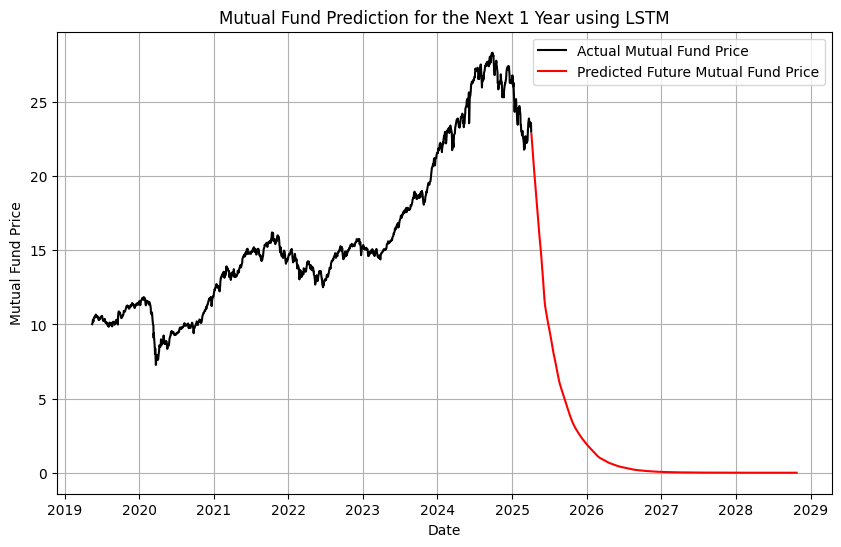


📊 Evaluation Metrics on Validation Set:
MAE  (Mean Absolute Error): 0.0113
MSE  (Mean Squared Error):  0.0002
RMSE (Root Mean Squared Error): 0.0136


In [ ]:
# ==== STEP 6: Create Dates and Plot ====

last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_days + 1, freq='D')[1:]

plt.figure(figsize=(10, 6))
plt.plot(data.index, nav_prices, label='Actual Mutual Fund Price', color='black')
plt.plot(future_dates, future_prices, label='Predicted Future Mutual Fund Price', color='red')
plt.title('Mutual Fund Prediction for the Next 1 Year using LSTM')
plt.xlabel('Date')
plt.ylabel('Mutual Fund Price')
plt.legend()
plt.grid(True)
plt.show()


# === 9. Evaluate on Last 100 Days ===
val_days = 100
val_input_data = scaled_data[-(val_days + time_step):]

X_val = []
y_val = []

for i in range(time_step, len(val_input_data)):
    X_val.append(val_input_data[i - time_step:i])
    y_val.append(val_input_data[i])

X_val = np.array(X_val).reshape(-1, time_step, 1)
y_val = np.array(y_val).reshape(-1, 1)

y_val_pred = model.predict(X_val, verbose=0)

# Inverse transform for metric comparison
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)

# === 10. Metrics ===
mae = mean_absolute_error(y_val_true, y_val_pred)
mse = mean_squared_error(y_val_true, y_val_pred)
rmse = math.sqrt(mse)

print(f"\n📊 Evaluation Metrics on Validation Set:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"MSE  (Mean Squared Error):  {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")